In [67]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [68]:
TRAIN_DATA = Path("D:/.projects/uit-ds-2025/dataset/vihallu-train-final.csv")
TEST_DATA = Path("D:/.projects/uit-ds-2025/dataset/vihallu-test-final.csv")

In [69]:
train_df = pd.read_csv(TRAIN_DATA)
test_df = pd.read_csv(TEST_DATA)

In [70]:
train_df.head()

,id,context,prompt,response,label,normalized_response
0,10fca062-d343-4eca-8434-93c7a8aa5e0e,Vị trí địa lý nằm giữa phương Đông và Địa Trun...,Dựa trên việc Đế quốc Ottoman không bao giờ ki...,Nền ẩm thực của Thổ Nhĩ Kỳ được xây dựng từ gi...,extrinsic,Nền ẩm thực của Thổ Nhĩ Kỳ được xây dựng từ gi...
1,acbc06f5-a69d-4ebc-9b80-aaea59f71475,Sao Hải Vương có cấu tạo tương tự như Sao Thiê...,Tần suất các nhà khoa học coi Sao Thiên Vương ...,Các nhà khoa học thường phân loại Sao Thiên Vư...,extrinsic,Các nhà khoa học thường phân loại Sao Thiên Vư...
2,5798f11f-03aa-4e4c-8cac-5a7e9bfb8225,"Trong những năm đầu thế kỷ 21, sự nổi lên của ...",Nguồn tiền dollar mà Cuba nhận được trong một ...,"Không, nguồn tiền dollar mà Cuba nhận được từ ...",no,Nguồn tiền dollar mà Cuba nhận được trong một ...
3,828fe10c-2688-487e-9f8c-683eb0d2aed7,"Kể từ khi độc lập, Malaysia trở thành một tron...",Những yếu tố nào đóng góp cho sự phát triển củ...,Một yếu tố chính thúc đẩy kinh tế Malaysia là ...,intrinsic,Những yếu tố đóng góp cho sự phát triển của nề...
4,a77b5dcf-8f5c-47f3-af8f-82e2a94717ef,Thảm thực vật tự nhiên của Hà Nam gồm có rừng ...,"Tại vùng núi phía Tây Hà Nam, thảm thực vật tự...",Vùng núi phía Tây Hà Nam không phải là sa mạc;...,extrinsic,"Có đúng, tại vùng núi phía Tây Hà Nam, thảm th..."


In [71]:
print(len(train_df), len(test_df))

6999 1000


In [72]:
test_df['og_length'] = (test_df['response'].str.split(' ')).apply(len)
test_df['new_length'] = (test_df['normalized_response'].str.split(' ')).apply(len)
# test_df['length'] = (test_df['context'] + test_df['response']).apply(len)

In [73]:
# plt.hist(train_df['og_length'], bins=200, alpha=0.5, label='Original Lengths')
# plt.hist(train_df['new_length'], bins=200, alpha=0.5, label='New Lengths')
# plt.xlabel('Length of Response (in words)')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

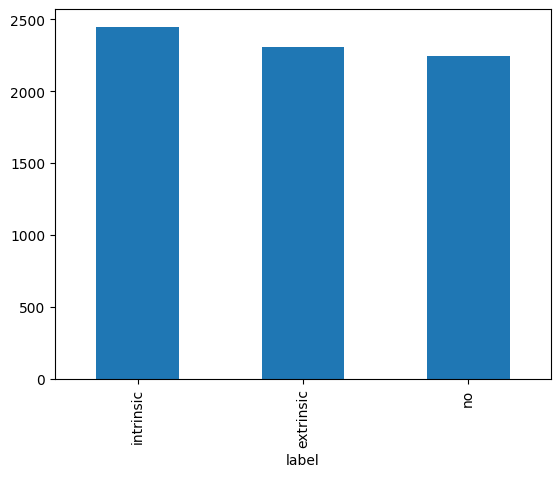

In [74]:
train_df['label'].value_counts().plot(kind='bar')
plt.show()

In [75]:
## use normalized repsonse if og_length < 10
test_df['use_normalized'] = test_df['og_length'] < 10
test_df['final_response'] = test_df.apply(lambda row: row['normalized_response'] if row['use_normalized'] else row['response'], axis=1)

test_df[(abs(test_df['new_length'] - test_df['og_length']) > 10) & (test_df['og_length'] < 10)]

,id,context,prompt,response,predict_label,normalized_response,og_length,new_length,use_normalized,final_response
106,5f600ddf-c105-42d7-8688-52fbe91b2c67,"Đến thế kỷ 1, tầng lớp quý tộc Parthia đã nắm ...",Hai gia tộc nào đã bị lãng quên hoàn toàn và k...,Gia tộc Suren và gia tộc Karen.,NaN,Hai gia tộc Gia tộc Suren và gia tộc Karen khô...,7,43,True,Hai gia tộc Gia tộc Suren và gia tộc Karen khô...
887,5d918e76-0242-4e79-8647-339ada14bfb4,"Ngày 10 tháng 8 năm 1792, một đám đông giận dữ...","Để phúc đáp lại tuyên chiến của Pháp, các nước...",vào mùa xuân năm 1793.,NaN,"Để phản ứng với tuyên chiến của Pháp, các nước...",5,26,True,"Để phản ứng với tuyên chiến của Pháp, các nước..."


In [76]:
test_df = test_df.drop(columns=['og_length', 'new_length', 'use_normalized'])

test_df.to_csv("D:/.projects/uit-ds-2025/dataset/vihallu-test-true-final.csv", index=False)